In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
#pp = pd.read_csv("pp.csv")
pn = pd.read_csv("extract/pn.csv")
neg_pos = pd.read_csv("extract/np.csv")
nn = pd.read_csv("extract/nn.csv")

In [4]:
pp_df = nn.T.reset_index()

In [5]:
pp_df['singer'] = pp_df['index'].apply(lambda x : x.split('/')[1].split('_')[0])
pp_df['song'] = pp_df['index'].apply(lambda x : x.split('/')[1].split('_')[1].split('.')[0])

In [6]:
pp_df = pp_df.iloc[:, 1:]

In [7]:
pp_df

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,singer,song
0,0.092979,0.060315,0.002984,-0.028072,-0.022559,-0.013258,0.064474,0.017393,-0.000971,0.036712,...,0.073284,-0.020434,-0.081386,-0.028070,0.043304,-0.009552,0.023626,0.001030,이정,겨울봄
1,0.017288,0.002834,0.019412,-0.046462,0.041500,0.028155,-0.015707,0.014919,-0.005732,0.027235,...,-0.018270,0.059704,-0.006492,0.011574,0.025597,0.000384,-0.014803,0.014170,버즈,거짓말
2,0.018432,0.007049,-0.008035,0.027406,0.008342,0.018518,0.013095,-0.001857,-0.060093,0.037357,...,0.022087,0.009385,-0.009863,-0.017008,0.003664,-0.016812,0.020691,0.007014,김광석,너무 깊이 생각하지마
3,0.023699,0.000472,-0.035731,-0.024283,-0.007454,0.020623,-0.017685,-0.008884,-0.022374,0.003817,...,0.022303,-0.011458,-0.009396,-0.000737,0.024010,-0.022409,0.021698,0.024140,소찬휘,크게 라디오를 켜고
4,0.014552,0.060930,0.027927,0.039669,-0.031903,-0.020108,0.031503,-0.005705,0.027925,0.037946,...,0.028811,-0.006522,-0.005320,-0.001395,0.009847,0.016336,0.030493,-0.017600,이적,당연한 것들
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.043994,0.018040,-0.023265,-0.001954,0.018103,0.001729,-0.010918,0.016958,-0.013137,0.067056,...,0.056055,-0.005907,-0.014321,0.004562,-0.022152,-0.041834,0.032977,0.016624,장나라,I Love School
4496,-0.011690,-0.014079,-0.035988,0.000763,0.001494,0.003794,-0.007309,0.010931,0.011567,-0.010060,...,0.011779,-0.016086,0.021464,0.022731,0.002888,0.018900,-0.012528,-0.008189,식케이,이해해줘 (Somebody Else)
4497,0.030749,-0.000489,-0.022795,-0.014482,0.005580,0.028776,-0.042953,-0.017884,-0.025602,-0.004187,...,0.008161,-0.001209,0.003361,0.025583,-0.000750,-0.003767,-0.005379,-0.005499,존박,내가 다 줄게요
4498,0.003705,0.029077,-0.042997,-0.041534,0.033782,0.016564,-0.044663,-0.004320,-0.012908,-0.006758,...,0.015139,0.036101,-0.018118,0.014268,0.023805,-0.010884,0.006361,0.015643,김창완,동네길


In [8]:
from sklearn.decomposition import PCA
pp_df_pca = PCA().fit(pp_df.iloc[:, :-2])

In [9]:
import numpy as np
cumsum = np.cumsum(pp_df_pca.explained_variance_ratio_)

/Users/gimjeongha/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


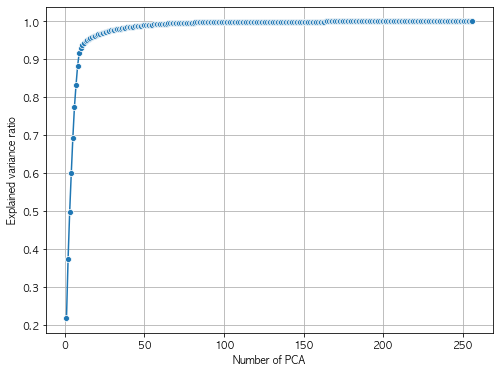

In [10]:
import matplotlib.pylab as plt
import seaborn as sns
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,pp_df.iloc[:, :-2].shape[1]+1),np.cumsum(pp_df_pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

## UMAP

In [11]:
import umap

In [12]:
reducer = umap.UMAP()

In [13]:
embedding = reducer.fit_transform(pp_df.iloc[:, :-2])
embedding.shape

(4500, 2)

In [14]:
emb_df = pd.concat([pd.DataFrame(embedding) , pp_df.iloc[:, -2:]] , axis = 1 )
emb_df.columns = [ 'col_0', 'col_1', 'singer', 'song']

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
emb_df['singer_le'] = le.fit_transform(emb_df['singer']) ; emb_df

,col_0,col_1,singer,song,singer_le
0,8.007363,7.411928,이정,겨울봄,105
1,7.479320,9.365870,버즈,거짓말,55
2,8.066087,9.236255,김광석,너무 깊이 생각하지마,13
3,11.088725,7.784585,소찬휘,크게 라디오를 켜고,64
4,8.848311,7.831528,이적,당연한 것들,104
...,...,...,...,...,...
4495,11.829006,8.456569,장나라,I Love School,115
4496,9.271808,7.835517,식케이,이해해줘 (Somebody Else),73
4497,8.281128,6.084963,존박,내가 다 줄게요,130
4498,10.303481,9.911397,김창완,동네길,26


In [16]:
emb_df['singer'].unique()

array(['이정', '버즈', '김광석', '소찬휘', '이적', '김연자', '김종국', '김예림', '박현빈', '거미',
       '윤하', '백아연', '김건모', '나윤권', '전인권', '이효리', '이선희', '권진아', '카더가든',
       '박진영', '양희은', '정동원', '바비 킴', '왁스', '더원', '잔나비', '임재범', '아이유',
       '식케이', '넬', '이은미', '케이시', '오왠', '태진아', '김연지', '정승환', '휘성', '윤종신',
       '김태우', '김창완', '정준일', '손승연', '하동균', '샘김', '서문탁', '박정현', '백지영',
       '아이비', '소향', '이찬원', '조용필', '이승환', '폴킴', '임영웅', '로이킴', '황치열', '김정민',
       '남진', 'XIA (준수)', '이수영', '헤이즈', '양파', '장재인', '에일리', '박완규', '김재환',
       '김현식', '제시', '안예은', '박재정', '자우림', '김호중', '백예린', '알리', 'JUNIEL',
       '보아', '송가인', '윤상', '임창정', '송하예', '윤미래', '이승철', '치즈', '제이', '송대관',
       '수란', '양다일', '김연우', '영탁', '린', '에릭남', '나얼', '이문세', 'KCM', '홍대광',
       '10CM', '박남정', '태연', '기리보이', '신해철', '엄정화', '이석훈', '김동률', '김범수',
       '케이윌', '비', '장범준', '현숙', '정인', '인순이', '김현철', '김현성', '지아', '박상민',
       '스텔라장', '루시드폴', '볼빨간사춘기', '윤도현', '별', '장나라', '박화요비', '장윤정', '한동근',
       '유승우', '김완선', '적재', '선우정아', '김조한', '이진아', '규현', '나비', '싸이'

In [67]:
female = ['소찬휘', '김연자','김예림','거미',
       '윤하', '백아연',  '이효리', '이선희', '권진아', '양희은', '왁스',  '아이유',
       '이은미', '케이시',  '김연지',  '손승연',  '서문탁', '박정현', '백지영',
       '아이비', '소향', '이수영', '헤이즈', '양파', '장재인', '에일리', '제시', '안예은', '자우림', '백예린', '알리', 'JUNIEL',
       '보아', '송가인', '송하예', '윤미래', '치즈', '제이', '수란', '린', '태연', '엄정화', 
        '현숙', '정인', '인순이',  '지아', '스텔라장', '볼빨간사춘기',  '별', '장나라', '박화요비', '장윤정',
        '김완선', '선우정아', '이진아',  '나비',  '김나영', '홍진영']

emb_df['gender'] = emb_df['singer'].apply(lambda x : 'female' if x in female else 'male' ) ; emb_df

,col_0,col_1,singer,song,singer_le,gender
0,8.007363,7.411928,이정,겨울봄,105,male
1,7.479320,9.365870,버즈,거짓말,55,male
2,8.066087,9.236255,김광석,너무 깊이 생각하지마,13,male
3,11.088725,7.784585,소찬휘,크게 라디오를 켜고,64,female
4,8.848311,7.831528,이적,당연한 것들,104,male
...,...,...,...,...,...,...
4495,11.829006,8.456569,장나라,I Love School,115,female
4496,9.271808,7.835517,식케이,이해해줘 (Somebody Else),73,male
4497,8.281128,6.084963,존박,내가 다 줄게요,130,male
4498,10.303481,9.911397,김창완,동네길,26,male


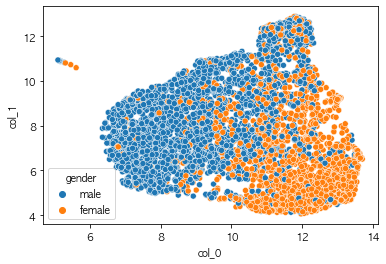

In [69]:
sns.scatterplot( x = "col_0" , y = "col_1" , data = emb_df , hue = "gender")
plt.show()

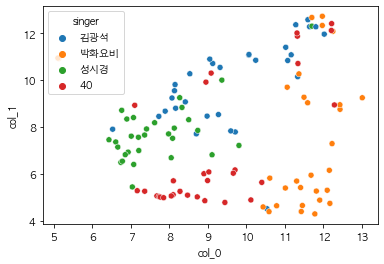

In [60]:
sin = ['김광석',  '성시경' ,'박화요비', '40']
sample = emb_df.query(' singer in @sin')
sns.scatterplot( x = "col_0" , y = "col_1" , data = sample , hue = "singer")
plt.show()

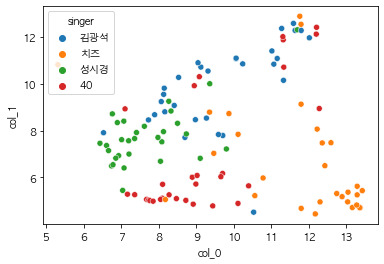

In [106]:
sin = ['김광석','성시경',  '40' , '치즈']
sample = emb_df.query(' singer in @sin')
sns.scatterplot( x = "col_0" , y = "col_1" , data = sample , hue = "singer")
plt.show()

In [ ]:
# 김광석 성시경 백아연 김예림 40 박화요비 서문탁 지아 치즈 양파 
# 스탠딩 에그 규현 나윤권

In [176]:
emb_df.groupby('singer').var()[['col_1', 'col_1']].mean(axis = 1) .sort_values( ascending = True )

singer
김태우     1.294323
이효리     1.297513
보아      1.336696
테이      1.537352
성시경     1.613803
          ...   
김연지     8.063120
이수영     8.188165
안예은     8.344830
박화요비    8.426555
알리      8.967175
Length: 150, dtype: float32

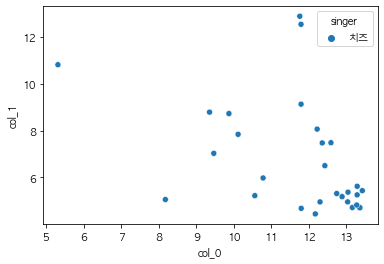

In [179]:
sin = ['치즈']
sample = emb_df.query(' singer in @sin')
sns.scatterplot( x = "col_0" , y = "col_1" , data = sample , hue = "singer")
plt.show()

## T-SNE

In [182]:
from sklearn.manifold import TSNE

tsne_np = TSNE(n_components = 2).fit_transform(pp_df.iloc[:, :-2])
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

/Users/gimjeongha/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/gimjeongha/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [184]:
tsne_df = pd.concat([ tsne_df , pp_df.iloc[:, -2:]] , axis = 1 )

In [185]:
tsne_df['gender'] = tsne_df['singer'].apply(lambda x : 'female' if x in female else 'male' ) ; tsne_df

,component 0,component 1,singer,song,gender
0,19.754810,35.388088,이정,겨울봄,male
1,-15.562014,52.688580,버즈,거짓말,male
2,0.957094,5.727623,김광석,너무 깊이 생각하지마,male
3,-7.971611,-12.622182,소찬휘,크게 라디오를 켜고,female
4,3.802813,25.327011,이적,당연한 것들,male
...,...,...,...,...,...
4495,-18.496971,-30.228146,장나라,I Love School,female
4496,7.763282,13.592658,식케이,이해해줘 (Somebody Else),male
4497,39.936295,24.983887,존박,내가 다 줄게요,male
4498,-21.904264,-11.989493,김창완,동네길,male


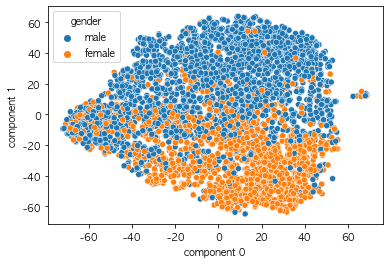

In [191]:
sns.scatterplot( x = "component 0" , y = "component 1" , data = tsne_df , hue = "gender")
plt.show()

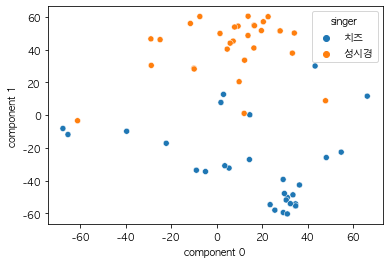

In [194]:
sin = ['성시경',  '치즈']
sample = tsne_df.query(' singer in @sin')
sns.scatterplot( x = "component 0" , y = "component 1" , data = sample , hue = "singer")
plt.show()

## Factor Analyzer

In [181]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(pp_df.iloc[:, :-2])

kmo_model # FA 의미 있음

0.7923604421324952

In [206]:
pp_df['col'] = pp_df['singer'] + '_'+ pp_df['song'] 
df_fa = pd.concat([pp_df.iloc[:, :-3] , pp_df.iloc[:, -1]] , axis = 1 )
df_fa = df_fa.T
df_fa.columns = list(df_fa.iloc[-1, :])
df_fa = df_fa.iloc[:-1, :]

In [220]:
# fa = FactorAnalyzer()

# fa.fit( df_fa )

KeyboardInterrupt: 

In [ ]:
# fa.loadings_.shape

In [ ]:
# gender classification 후 note 조정 어떻게 할건지 알아보기